## MNIST1 with Ai2z

Data from https://github.com/JuliaReach/NeuralVerification.jl/blob/master/test/runtime1.jl, line 

https://github.com/JuliaReach/NeuralVerification.jl/blob/master/test/runtime1.jl#L71

In [36]:
using NeuralVerification, LazySets, Plots
using NeuralVerification: forward_layer, forward_partition

In [7]:
function mnist1_problem()
    mnist1_file = "/home/mforets/.julia/dev/NeuralVerification/examples/networks/mnist1.nnet"
    mnist1 = read_nnet(mnist1_file, last_layer_activation = Id())
    # entry 23 in MNIST datset
    input_center = [0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,230,253,248,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,118,253,253,225,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,253,253,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,206,253,253,186,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,253,253,239,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,255,253,186,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,229,254,207,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,229,253,254,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,254,254,213,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,251,253,253,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,212,253,250,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,253,253,253,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,189,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,235,253,126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,248,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,235,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    output_center = [-1311.1257826380004,4633.767704436501,-654.0718535670002,-1325.349417307,1175.2361184373997,-1897.8607293569007,-470.3405972940001,830.8337987382,-377.7467076115001,572.3674015264198]

    in_epsilon = 1.0 # 0-255
    out_epsilon = 10.0 #logit domain

    input_low = input_center .- in_epsilon
    input_high = input_center .+ in_epsilon

    output_low = output_center .- out_epsilon
    output_high = output_center .+ out_epsilon

    inputSet = Hyperrectangle(low=input_low, high=input_high)
    outputSet = Hyperrectangle(low=output_low, high=output_high)

    problem_mnist = Problem(mnist1, inputSet, outputSet)
end

mnist1_problem (generic function with 1 method)

In [30]:
prob = mnist1_problem();
X0 = prob.input;
Y = prob.output;
net = prob.network;

In [45]:
@time X1 = forward_layer(Ai2z(), net.layers[1], X0)
@time X2 = forward_layer(Ai2z(), net.layers[2], X1);
length(X2)

  0.004876 seconds (38 allocations: 5.453 MiB)
  0.000125 seconds (8 allocations: 123.578 KiB)


1

In [46]:
out = first(X2);

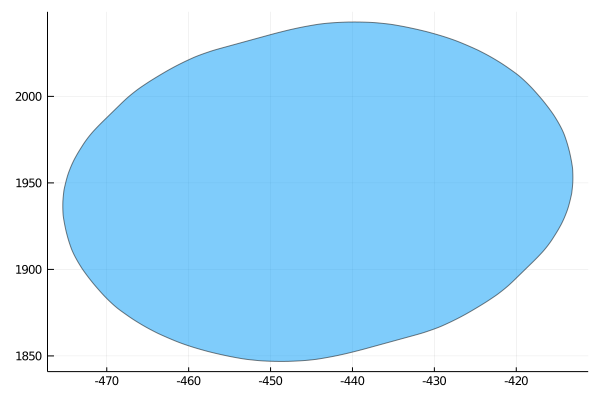

In [52]:
plot(Projection(out, [1, 2]))

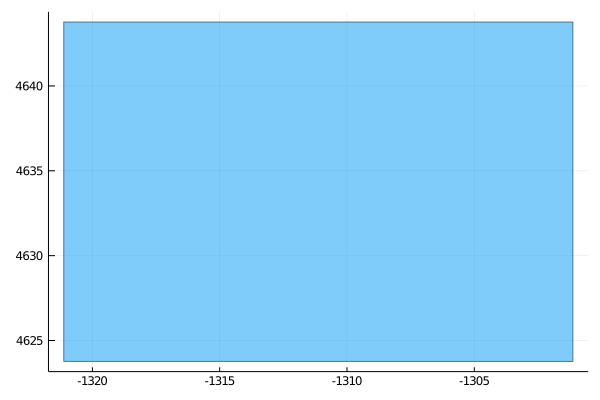

In [53]:
plot(Projection(Y, [1, 2]))

In sum, the output does not contain the `outputSet`.

----

## MNIST_SMALL with Ai2z

Data from https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl


Line number

https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl#L21

In [58]:
function mnist_small()
    mnist_small = read_nnet("/home/mforets/.julia/dev/NeuralVerification/examples/networks/mnist_small.nnet")

    # entry 23 in MNIST datset
    input_center = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,230,253,248,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,118,253,253,225,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,253,253,253,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,206,253,253,186,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,253,253,239,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,253,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,255,253,186,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,229,254,207,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,229,253,254,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,254,254,213,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,251,253,253,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,212,253,250,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,214,253,253,137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,253,253,253,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,253,253,189,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,224,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,235,253,126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,248,253,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,225,235,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    output_center = [-1311.1257826380004,4633.767704436501,-654.0718535670002,-1325.349417307,1175.2361184373997,-1897.8607293569007,-470.3405972940001,830.8337987382,-377.7467076115001,572.3674015264198]

    in_epsilon = 1 #0-255
    out_epsilon = 10 #logit domain

    input_low = input_center .- in_epsilon
    input_high = input_center .+ in_epsilon

    output_low = output_center .- out_epsilon
    output_high = output_center .+ out_epsilon

    inputSet = Hyperrectangle(low=input_low, high=input_high)
    outputSet = Hyperrectangle(low=output_low, high=output_high)

    problem_hyperrect_small = Problem(mnist_small, inputSet, outputSet)
end

mnist_small (generic function with 1 method)

In [59]:
prob = mnist_small();
X0 = prob.input;
Y = prob.output;
net = prob.network;

In [61]:
net.layers

1-element Array{NeuralVerification.Layer,1}:
 NeuralVerification.Layer{Id,Float64}([0.00967898 0.0158844 … 0.00187861 0.00280567; -0.00881655 0.00386361 … -0.00767655 -0.00259271; … ; 0.0112104 0.00166185 … 0.00131557 -0.00481982; 0.0125582 -0.00665823 … -0.00723359 0.0167881], [-0.400092, 0.375775, 0.136846, -0.239122, -0.00442209, 1.41899, -0.130078, 0.650365, -1.54558, -0.262676], Id())

In [62]:
@time X1 = forward_layer(Ai2z(), net.layers[1], X0)
length(X1)

  0.011063 seconds (4.43 k allocations: 5.067 MiB)


1

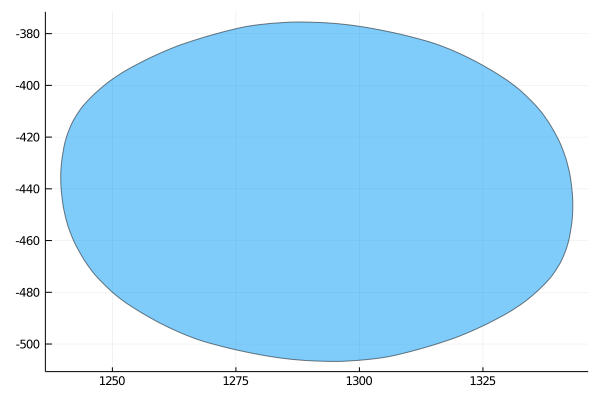

In [71]:
out=first(X1)
plot(Projection(out, [9, 10]))

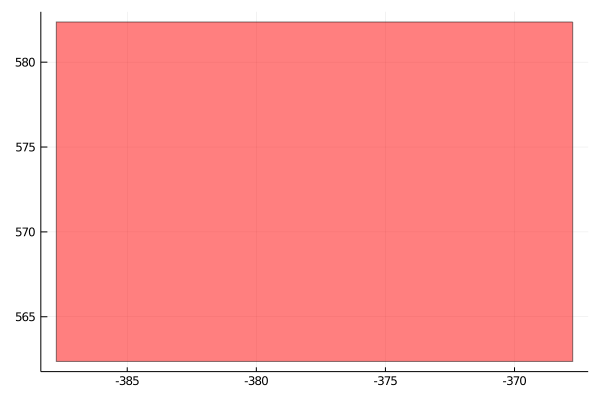

In [72]:
plot(Projection(Y, [9, 10]), color=:red)

----

TODO:

- Probar con Ai2z las otras "mnist" del archivo https://github.com/sisl/NeuralVerification.jl/blob/master/test/runtime.jl#L21

- Probar que da ReluVal a ver si es comparable con lo nuestro